In [1]:
pip install web3==4.2.1

     |████████████████████████████████| 122kB 2.8MB/s 
     |████████████████████████████████| 81kB 8.8MB/s 
     |████████████████████████████████| 481kB 45.1MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 9.7MB 39.1MB/s 
  Created wheel for lru-dict: filename=lru_dict-1.1.6-cp36-cp36m-linux_x86_64.whl size=25857 sha256=57d22d57dc0f7d40b220e41794b45d92b6c8bf431f7275e5fc193b9ae233f0b0
  Stored in directory: /root/.cache/pip/wheels/b7/ef/06/fbdd555907a7d438fb33e4c8675f771ff1cf41917284c51ebf
  Created wheel for cytoolz: filename=cytoolz-0.10.1-cp36-cp36m-linux_x86_64.whl size=1256677 sha256=557f1a0ef9e28edefad9eb74f9a0f2b611a4adab79ad71667ef66241b1c0134e
  Stored in directory: /root/.cache/pip/wheels/64/2a/18/d962b614e055577e7d9a3e4813e0742f822ca9c8800cc3783a
  Created wheel for parsimonious: filename=parsimonious-0.8.1-cp36-none-any.whl size=42709 sha256=d064aa1e6e5cf345cbabc162dcbde6c3e2f264eb447ef6556ba611aa24858a03
  Stored in direc

In [0]:
from web3 import Web3
import numpy as np
import matplotlib.pyplot as plt
import math

начальный блок: 8960830
конечный блок: 8960840
Математическое ожидание: :  0.089295
Дисперсия: :  0.002898
Среднеквадратическое отклонение: :  0.053829
Разброс: :  0.174723
Медиана: :  0.076521
Кол-во смарт контрактов :  1410


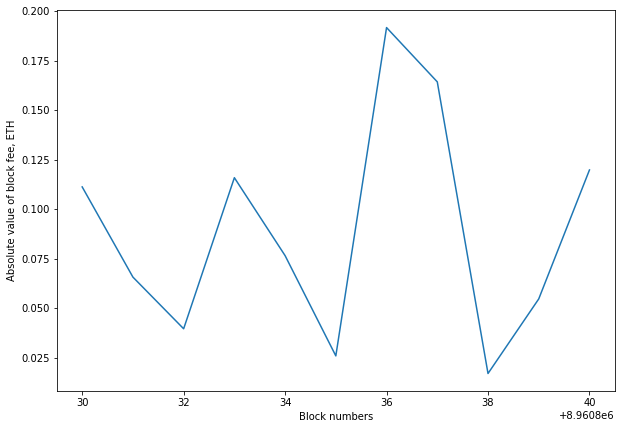

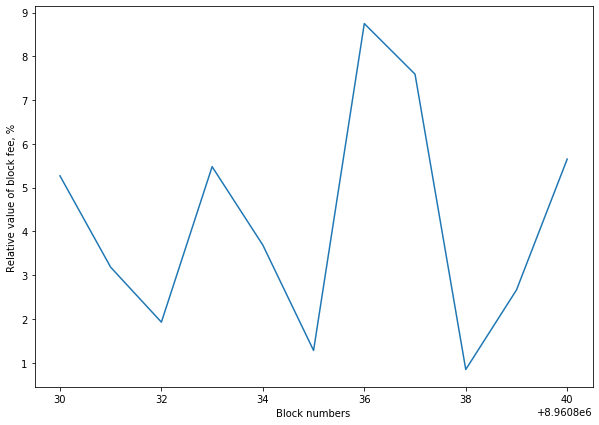

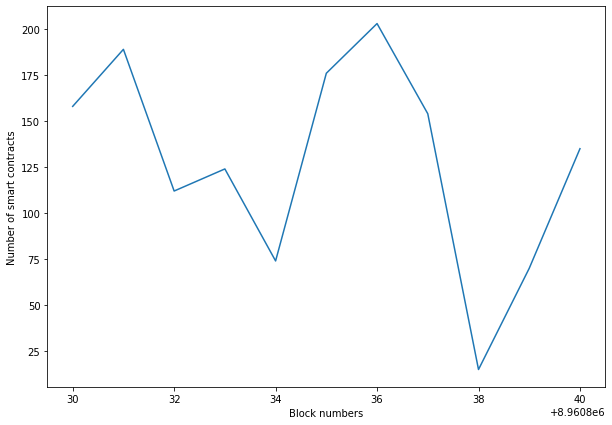

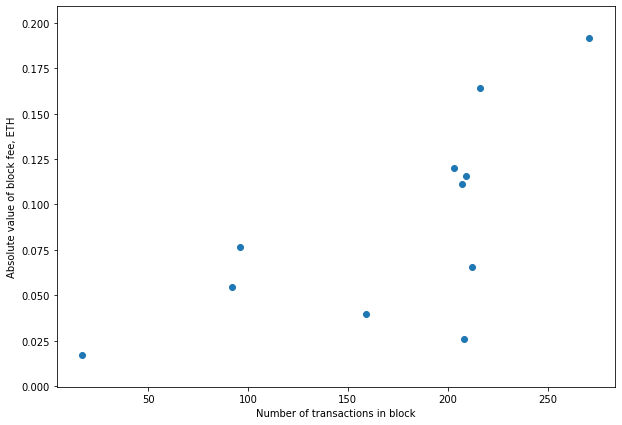

In [12]:
STATIC_REWARD = 2   # заданная награда за блок в единицах ETH
TO_ETH = 10**(-18)

start = 8961400 - 10*(58-1)
finish = 8961400 - 10*(58-2)
print('начальный блок:', start)
print('конечный блок:', finish)

absolute = []
relative = []
block = []
contracts =[]
transactions = []

# конвертирование в единицы ETH
def to_eth(weis):
    return weis * TO_ETH


# Подсчёт общей комиссии по каждому блоку и число обращений к смарт контрактам
def block_fee(block):
    summa = 0
    contracts_ = 0
    for tr in block.transactions:
        price = tr.gasPrice
        used = web3.eth.getTransactionReceipt(tr.hash).gasUsed
        summa += price * used
        if tr.input != '0x':
            contracts_ += 1
    return to_eth(summa), contracts_


# Подсчёт награды за блок
def block_reward(block, fee_value):
    return STATIC_REWARD + fee_value + len(block_.uncles) / 57


# Подключаемся к инфуре
web3 = Web3(Web3.HTTPProvider("https://mainnet.infura.io/v3/fff8ab47d873413daa1fae145e97d3d4"))

# Выгрузка необходимой информации по всем нужным блокам 
for block_n in range(start, finish+1):
    block_ = web3.eth.getBlock(block_n, True)
    total, contracts_n = block_fee(block_)
    number = block_.number
    reward = block_reward(block_, total)
    absolute.append(total)
    relative.append(total * 100 / reward)
    block.append(number)
    contracts.append(contracts_n)
    transactions.append(len(block_.transactions))

# Подсчёт статистических данных
M = np.mean(absolute)
mediana = np.median(absolute)
data_range = np.max(absolute) - np.min(absolute)
D = np.var(absolute)
S = math.sqrt(Dx)
contr = np.sum(contracts_number)

output_data = {'Математическое ожидание:': M,
               'Дисперсия:': D,
               'Среднеквадратическое отклонение:': S,
               'Разброс:': data_range,
               'Медиана:': mediana,
               'Кол-во смарт контрактов': contr}
for k, v in output_data.items():
    print(k, ': ', round(v, 6))

# Построение графиков
plt.figure(figsize=(10,7))
plt.plot(block, absolute)
plt.xlabel('Block numbers')
plt.ylabel('Absolute value of block fee, ETH')
plt.show()

plt.figure(figsize=(10,7))
plt.plot(block, relative)
plt.xlabel('Block numbers')
plt.ylabel('Relative value of block fee, %')
plt.show()

plt.figure(figsize=(10,7))
plt.plot(block, contracts)
plt.xlabel('Block numbers')
plt.ylabel('Number of smart contracts')
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(transactions, absolute)
plt.xlabel('Number of transactions in block')
plt.ylabel('Absolute value of block fee, ETH')
plt.show()